- นฤวดา สนธิยานนท์ 62090500431
- อภิชญา  จิไธสง 62090500442
- เกวรินทร์ เจดีย์สถาน  62090500444
- โยษิตา พรศิริอนันต์ 62090500448

<font size="6"> <center> **Part 1** </font>

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt



covid = pd.read_csv("input/covid-19.csv")
As    = pd.read_csv("input/Asales.csv")
Bs    = pd.read_csv("input/Bsales.csv")
item  = pd.read_csv("input/items.csv")

<br><p><font size="4">1. การเปลี่ยนแปลงของจำนวนผู้ป่วยรายสองสัปดาห์ล่าสุด ที่ขึ้นหรือลงกี่ % เทียบกับสองสัปดาห์ก่อนหน้า โดยแสดงค่าและชื่อประเทศ ที่เพิ่มสูงสุด 10 ประเทศ และลดลงเยอะที่สุด 10 ประเทศ (5 คะแนน)</font></p>

In [2]:
pd.set_option("display.precision", 2)


covid['date'] = pd.to_datetime(covid['date'])   # การเปลี่ยน date จาก string ให้เป็น datetime
covid['week'] = covid.date.dt.week              # สร้าง column เพื่อเก็บข้อมูล week
covid['year'] = covid.date.dt.year              # สร้าง column เพื่อเก็บข้อมูล year


c = covid.fillna('nan') # เปลี่ยนค่าจาก 0 ให้เป็น NaN ให้หมดเพราะว่า 0 หาค่า % ความต่างไม่ได้
c = covid[covid.new_cases > 0]


# การเลือกข้อมูลที่เป็น week 35, 36 และ year 2021 เนื่องจากเป็น 2 สัปดาห์ก่อนหน้า และจัดกลุ่มโดยใช้ location
week1 = c.query('week >= 35 & week <= 36 & year == 2021').groupby(by = 'location')[['new_cases']].sum()
week1 = week1.rename(columns = {'new_cases':'two_weeks_ago'})


# การเลือกข้อมูลที่เป็น week 37, 38 และ year 2021 เนื่องจากเป็น 2 สัปดาห์ล่าสุด และจัดกลุ่มโดยใช้ location
week2 = c.query('week >= 37 & week <= 38 & year == 2021').groupby(by = 'location')[['new_cases']].sum()
week2 = week2.rename(columns = {'new_cases':'two_weeks_later'})


# การรวมตารางข้อมูลระหว่าง week1 และ week2 
table = pd.merge(week1, week2, on = 'location')


# การคำนวณ % ความต่างระหว่าง 2 week
diff = table.two_weeks_later - table.two_weeks_ago
table['percent'] = ( diff / table.two_weeks_ago.abs()) * 100


# แสดงผล % การเปลี่ยนแปลงสูงสุดของแต่ละประเทศ 10 อันดับ
table.sort_values(by = ['percent'], ascending = False).head(10).reset_index()

<ipython-input-2-d8b70a98628d>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  covid['week'] = covid.date.dt.week              # สร้าง column เพื่อเก็บข้อมูล week


,location,two_weeks_ago,two_weeks_later,percent
0,Saint Vincent and the Grenadines,115.0,892.0,675.65
1,Singapore,4516.0,16205.0,258.84
2,Djibouti,119.0,393.0,230.25
3,Romania,24051.0,73302.0,204.78
4,Gabon,819.0,2488.0,203.79
5,Eritrea,15.0,39.0,160.00
6,Slovakia,3948.0,9798.0,148.18
7,Congo,168.0,412.0,145.24
8,Sao Tome and Principe,226.0,528.0,133.63
9,Ukraine,37701.0,80944.0,114.70


In [3]:
# แสดงผล % การเปลี่ยนแปลงต่ำสุดของแต่ละประเทศ 10 อันดับ
table.sort_values(by = ['percent']).head(10).reset_index()

,location,two_weeks_ago,two_weeks_later,percent
0,Madagascar,32.0,4.0,-87.50
1,Tajikistan,264.0,42.0,-84.09
2,Kosovo,14331.0,2868.0,-79.99
3,Monaco,93.0,27.0,-70.97
4,Japan,181741.0,53861.0,-70.36
5,Guinea-Bissau,256.0,77.0,-69.92
6,Democratic Republic of Congo,1588.0,521.0,-67.19
7,Senegal,769.0,264.0,-65.67
8,Sierra Leone,22.0,8.0,-63.64
9,Gambia,222.0,82.0,-63.06


<br><p><font size="4">2. จำนวนผู้ป่วยใหม่รายวันของแต่ละประเทศโดยเริ่มตั้งแต่วันที่ Mar 1, 2020. ให้เลือกรายชื่อประเทศที่ต้องการและวันเริ่มต้นได้ (3 คะแนน) 
</font></p>

In [4]:
covid['date'] = pd.to_datetime(covid['date'])                 # การเปลี่ยน date จาก string ให้เป็น datetime
data = covid[['date', 'new_cases_per_million', 'location']]   # เลือก column เฉพาะ date, new_cases_per_million (ใช้เพื่อให้เห็นข้อมูลมุมกว้าง), location


# เลือก date และ ประเทศที่ต้องการศึกษาเก็บไว้ในตัวแปรต่างๆ
UK = data.query("date >= '2020/03/01' & location == ['United Kingdom']")
US = data.query("date >= '2020/03/01' & location == ['United States']")
TH = data.query("date >= '2020/03/01' & location == ['Thailand']")
JP = data.query("date >= '2020/03/01' & location == ['Japan']")
IN = data.query("date >= '2020/03/01' & location == ['India']")

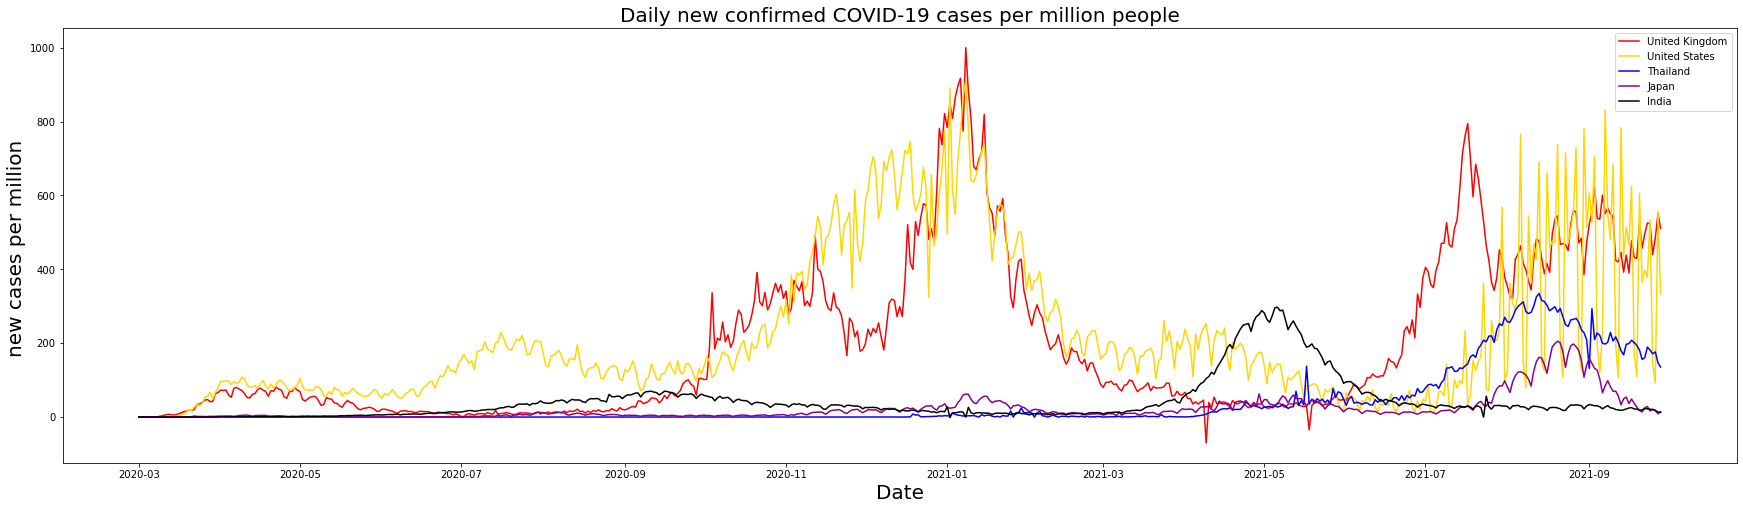

In [5]:
# บอกขนาดความกว้างและความสูงของกราฟ
fig = plt.figure(figsize=(30, 8)) 


# กำหนดค่าแกน x ให้แสดงผลค่าเป็น date
x1 = UK['date']
x2 = US['date']
x3 = TH['date']
x4 = JP['date']
x5 = IN['date']


# กำหนดค่าแกน y ให้แสดงค่า new_cases_per_million ของแต่ละประเทศที่ต้องการศึกษา
y1 = UK['new_cases_per_million']
y2 = US['new_cases_per_million']
y3 = TH['new_cases_per_million']
y4 = JP['new_cases_per_million']
y5 = IN['new_cases_per_million']


# กำหนดชื่อกราฟ
plt.title('Daily new confirmed COVID-19 cases per million people', {'size': 20})


# กำหนดชื่อ แกน y และ แกน x
plt.ylabel('new cases per million ', size = 20)
plt.xlabel('Date', size = 20)


# การ plot กราฟของแต่ละประเทศที่ต้องการศึกษา
plt.plot(x1, y1, color = 'red',  label = 'United Kingdom')
plt.plot(x2, y2, color = 'gold', label = 'United States')
plt.plot(x3, y3, color = 'blue', label = 'Thailand')
plt.plot(x4, y4, color = 'darkmagenta', label = 'Japan')
plt.plot(x5, y5, color = 'black',  label = 'India')


# การบอกรายละเอียดของเส้นกราฟ
plt.legend() 


# การแสดงผลกราฟ
plt.show()

<font size="6"> <center> **Part 2** </font>

<br><p><font size="4">3. ในข้อมูล Asales.csv ให้ตัดรายการที่มีค่า item_cnt_day หรือ item_price ที่น้อยกว่า 0 และแสดงผลข้อมูลให้เห็นในภาพรวมว่าตัดออกไปแล้ว (1 คะแนน)</font></p>

In [6]:
# ตัด row ที่มี item_price หรือ item_cnt_day น้อยกว่า 0 ออก
As = As.drop(As[(As['item_price'] < 0) | (As['item_cnt_day'] < 0)].index)

As

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


<br><p><font size="4">4. แสดงค่าเฉลี่ย, Median และพิสัยระหว่างควอร์ไทล์ (Interquartile Range) ของข้อมูล item_price (1 คะแนน)</font></p>

In [7]:
# เลือก column ที่ชื่อ item_price เพื่อนำมาหาค่า median และ mean ตามลำดับ
As['item_price'].agg([np.median, np.mean])

median    399.00
mean      889.47
Name: item_price, dtype: float64

In [8]:
# การหาค่าพิสัยระหว่างควอร์ไทล์ของ item_price
IQR = np.quantile(As['item_price'], 0.75) - np.quantile(As['item_price'], 0.25)
print("ค่าพิสัยระหว่างควอร์ไทล์ :", IQR)

ค่าพิสัยระหว่างควอร์ไทล์ : 750.0


<br><p><font size="4">5. รวมข้อมูลในไฟล์ items dataset เข้าไปใน sales dataset (1 คะแนน) </font></p>

In [9]:
# การรวมตารางข้อมูลระหว่าง Asales.csv และ items.csv
group = pd.merge(As, item)

group

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,iname22154,37
1,23.01.2013,0,24,22154,999.0,1.0,iname22154,37
2,20.01.2013,0,27,22154,999.0,1.0,iname22154,37
3,02.01.2013,0,25,22154,999.0,1.0,iname22154,37
4,03.01.2013,0,25,22154,999.0,1.0,iname22154,37
...,...,...,...,...,...,...,...,...
2928487,17.10.2015,33,25,8428,249.0,1.0,iname8428,40
2928488,01.10.2015,33,25,7903,12198.0,1.0,iname7903,15
2928489,29.10.2015,33,25,7610,2890.0,1.0,iname7610,64
2928490,22.10.2015,33,25,7635,2100.0,1.0,iname7635,64


<br><p><font size="4">6. เปลี่ยนชนิดข้อมูล date จาก string เป็นวันที่ date เพื่อการวิเคราะห์ต่อไป (1 คะแนน)</font></p>

In [10]:
# การเปลี่ยน date จาก string ให้เป็น datetime
group['date'] = pd.to_datetime(group['date'])

group[['date']]

,date
0,2013-02-01
1,2013-01-23
2,2013-01-20
3,2013-02-01
4,2013-03-01
...,...
2928487,2015-10-17
2928488,2015-01-10
2928489,2015-10-29
2928490,2015-10-22


<br><p><font size="4">7. มีทั้งหมดกี่ items จากทุก shop รวมกัน (1 คะแนน) </font></p>

In [11]:
# การตัดข้อมูลที่ซ้ำกันออกจาก column ที่ชื่อ item_id
total_item = group['item_id'].drop_duplicates()

# การนับ item ทั้งหมดจาก shop ที่ไม่ซ้ำกัน
print("มี Item ทั้งหมด :", total_item.count(), "ชิ้น")

มี Item ทั้งหมด : 21804 ชิ้น


<br><p><font size="4">8. item ใดที่ขายได้มากที่สุดในแต่ละ shop โดยแสดง shop_id, item_id และจำนวนที่ขายได้สุงสุด 10 shops  (4 คะแนน) 
</font></p>

In [12]:
# การดึงข้อมูลจาก group (ตัวแปรที่เก็บค่าตารางข้อมูลที่นำมารวมกันในข้อ 5)จับกลุ่มข้อมูล shop_id และ item_id โดยการนำค่า item_cnt_day มารวมกัน
best_seller = pd.pivot_table(group, index = ["shop_id", "item_id"], values = ["item_cnt_day"], aggfunc = np.sum)


# การเรียงลำดับกลุ่มข้อมูลข้างต้น โดยใช้ item_cnt_day และเรียงจากมากไปน้อย
top10 = best_seller[['item_cnt_day']].sort_values(by = "item_cnt_day", ascending = False) 


# การแสดง shop_id และ item_id ที่มี item_cnt_day รวมมากที่สุด 10 อันดับแรก 
top10.head(10)

item_cnt_day
shop_id item_id              
31      20949         19934.0
25      20949         14343.0
28      20949         13458.0
54      20949         12323.0
42      20949         10514.0
27      20949          8266.0
12      11373          6563.0
        11370          6163.0
57      20949          6116.0
47      20949          4530.0

<br><p><font size="4">9. ให้แสดงค่าเฉลี่ย, s.d., max, min ของราคาขายสินค้าของแต่ละร้านค้า โดยแสดงเพียงร้านที่มีค่าเฉลี่ยสูงสุด 5 อันดับและต่ำสุด 5 อันดับ (เรียงลำดับจากมากไปน้อย) (4 คะแนน) </font></p>

In [13]:
# การจับกลุ่ม shop_id และนำ item_price มาคำนวณหาค่า mean, std, max และ min 
info_price = group.groupby(['shop_id'])['item_price'].agg([np.mean, np.std])
info_price["max"] =  group.groupby(['shop_id'])['item_price'].agg(np.max)
info_price["min"] =  group.groupby(['shop_id'])['item_price'].agg(np.min)


# ใช้ค่า mean ในการเรียงลำดับจากมากไปน้อย
top5 = info_price.sort_values(by = 'mean', ascending = False) 


# แสดงผลค่า mean 5 อันดับแรกที่สูงสุด
top5.head(5)

,mean,std,max,min
shop_id,,,,
12,1458.68,3145.11,307980.0,0.91
2,1349.20,2223.27,34990.0,0.10
34,1333.12,2369.97,31990.0,0.99
20,1330.69,913.15,11599.0,119.00
9,1254.52,1418.86,27499.0,90.00


In [14]:
# แสดงผลค่า mean 5 อันดับแรกที่ต่ำสุด
top5.tail(5)

,mean,std,max,min
shop_id,,,,
55,607.88,833.93,27900.0,4.00
0,563.44,1243.79,15653.0,13.00
1,515.35,1202.20,15653.0,13.00
51,491.88,1241.64,26226.0,3.00
13,299.24,672.86,32437.0,1.83


<br><p><font size="4">10. ให้นำยอดขายของทุกร้านมาเรียงจากมากไปน้อย แล้วแบ่งร้านทั้งหมดออกเป็น 6 กลุ่ม จากนั้นให้แสดงยอดขายรวมของทั้ง 6 กลุ่มมาเปรียบเทียบกัน (เป็นรูป
สัดส่วนอย่างสวยงามเหมาะสม) (6 คะแนน)  </font></p>

In [15]:
# การดึงข้อมูลจาก group (ตัวแปรที่เก็บค่าตารางข้อมูลที่นำมารวมกันในข้อ 5)จับกลุ่มข้อมูล shop_id โดยการนำค่า item_price มารวมกัน 
# และ กำหนดให้ข้อมูลที่เป็น NaN เปลี่ยนเป็น 0 แทน เพื่อที่จะนำมาคำนวณได้
sell = pd.pivot_table(group, index = ['shop_id'], values = ['item_price'], aggfunc = np.sum, fill_value = 0)
sell = sell.round() # การปัดทศนิยมตามเหมาะสม


# การแบ่ง sell['item_price'] ให้เป็น 6 ช่วง และนำข้อมูลที่แบ่งได้มาเก็บใน cut_sell['Range']
cut_sell = pd.qcut(sell ['item_price'], 6).reset_index()
cut_sell['Range'] = cut_sell.pop('item_price')


# การ reset index ใน DataFrame และนำข้อมูล item_price จากตัวแปร sell ไปเก็บใน sell['Price']
sell = sell.reset_index()
sell['Price'] = sell.pop('item_price')


# การรวมข้อมูลระหว่าง sell และ cut_sell
sell = pd.merge(sell, cut_sell)


# แบ่งกลุ่มโดยการใช้ sell['Range'] และนำค่า sell['Price'] มารวมกัน
sell = sell.groupby(sell['Range']) 
sell = sell['Price'].sum()

sell 

Range
(355071.999, 5517157.667]      3.25e+07
(5517157.667, 25527810.0]      1.59e+08
(25527810.0, 37792372.5]       3.40e+08
(37792372.5, 51354017.0]       4.52e+08
(51354017.0, 62286440.167]     5.64e+08
(62286440.167, 170320729.0]    1.06e+09
Name: Price, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

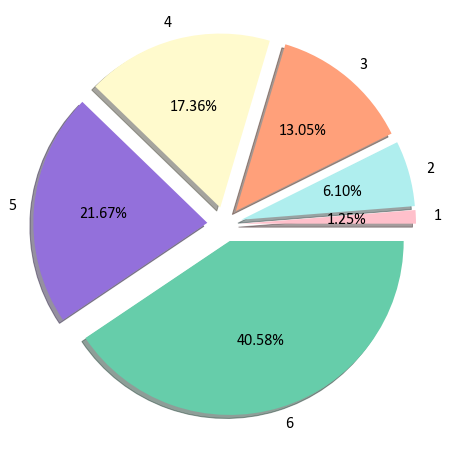

In [16]:
# การกำหนดข้อมูลต่างๆของกราฟวงกลม
label = ['1', '2', '3', '4','5','6']
colors = ['pink', 'paleturquoise', 'lightsalmon', 'lemonchiffon', 'mediumpurple','mediumaquamarine']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  


# การกำหนดขนาดความกว้างและความยาวของกราฟวงกลม
plt.figure(figsize=(18,8))


# การ plot กราฟวงกลมโดยใช้ข้อมูลจาก sell
plt.pie(sell, explode = explode, labels = label, colors = colors, autopct = '%1.2f%%', shadow = True, textprops = {'fontsize': 16, 'fontfamily': 'Calibri'})


# แสดงกราฟ
plt.show

<br><p><font size="4">11. ให้แสดงจำนวนสินค้าที่ขายได้รวมในแต่ละวันในสัปดาห์และยอดขายรวมในแต่ละวันในสัปดาห์โดยนำเสนอข้อมูลทั้งสองนี้ข้าง ๆ กัน โดยเอาเฉพาะปี 2015 ปีเดียว (6 คะแนน) </font></p>

In [17]:
# การเปลี่ยน date จาก string ให้เป็น datetime
group['date'] = pd.to_datetime(group['date'])
group['date']


group['day']   = group.date.dt.day_name()  # สร้าง column เพื่อเก็บข้อมูล name day (ชื่อวันต่างๆ)
group['month'] = group.date.dt.month       # สร้าง column เพื่อเก็บข้อมูล month
group['year']  = group.date.dt.year        # สร้าง column เพื่อเก็บข้อมูล year
group['sale']  = group['item_price'] * group['item_cnt_day']   # สร้าง column เพื่อเก็บข้อมูลยอดขาย

In [18]:
# สร้าง d เพื่อใช้ในการแยก year โดย d2015 คือ ปี 2015 และแยก d2015['day'] เพื่อเก็บ name day(ชื่อวันต่างๆ) ของปี 2015
d = dict(tuple(group.groupby(group['date'].dt.year)))
d2015 = d[2015]
d2015['day'] = d2015.date.dt.day_name()

d2015

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,day,month,year,sale
36,2015-07-19,30,6,22154,299.0,1.0,iname22154,37,Sunday,7,2015,299.0
37,2015-07-25,30,42,22154,299.0,1.0,iname22154,37,Saturday,7,2015,299.0
38,2015-07-17,30,42,22154,299.0,1.0,iname22154,37,Friday,7,2015,299.0
39,2015-07-20,30,57,22154,299.0,1.0,iname22154,37,Monday,7,2015,299.0
40,2015-07-18,30,35,22154,299.0,1.0,iname22154,37,Saturday,7,2015,299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2928487,2015-10-17,33,25,8428,249.0,1.0,iname8428,40,Saturday,10,2015,249.0
2928488,2015-01-10,33,25,7903,12198.0,1.0,iname7903,15,Saturday,1,2015,12198.0
2928489,2015-10-29,33,25,7610,2890.0,1.0,iname7610,64,Thursday,10,2015,2890.0
2928490,2015-10-22,33,25,7635,2100.0,1.0,iname7635,64,Thursday,10,2015,2100.0


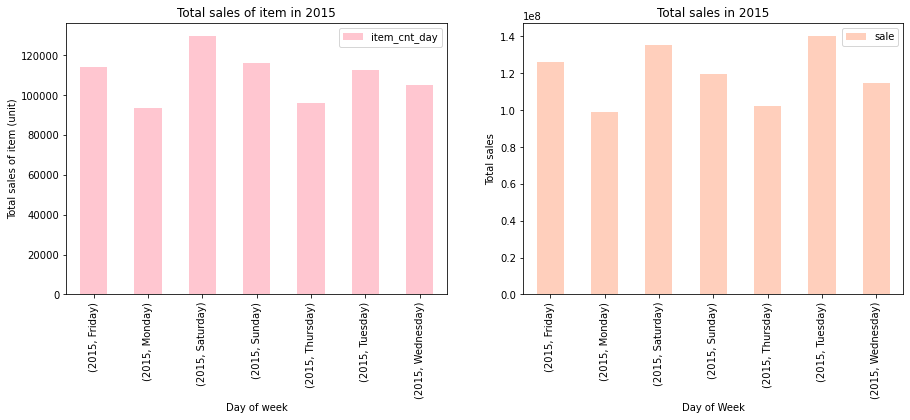

In [19]:
# กำหนดกราฟโดยใช้ nrow, ncols และกำหนดขนาดกราฟด้วย figsize 
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))


# การดึงข้อมูลจาก d2015 (ตัวแปรที่เก็บค่าตารางข้อมูลข้างต้น)จับกลุ่มข้อมูล year และ day โดยการนำค่า item_cnt_day มารวมกัน 
# กำหนดให้ข้อมูลที่เป็น NaN เปลี่ยนเป็น 0 แทน เพื่อที่จะนำมาคำนวณได้ และ plot กราฟ
total1 = pd.pivot_table(d2015, index = ['year', 'day'], values = ['item_cnt_day'], aggfunc = np.sum,
                        fill_value = 0).plot(kind = 'bar', ax = ax[0], color = 'pink', alpha = 0.9)


# การดึงข้อมูลจาก d2015 (ตัวแปรที่เก็บค่าตารางข้อมูลข้างต้น)จับกลุ่มข้อมูล year และ day โดยการนำค่า sale มารวมกัน 
# กำหนดให้ข้อมูลที่เป็น NaN เปลี่ยนเป็น 0 แทน เพื่อที่จะนำมาคำนวณได้ และ plot กราฟ
total2 = pd.pivot_table(d2015, index = ['year', 'day'], values = ['sale'], aggfunc = np.sum, 
                        fill_value = 0).plot(kind = 'bar', ax = ax[1], color = 'lightsalmon', alpha = 0.5)


# กำหนดชื่อกราฟ
ax[0].set_title('Total sales of item in 2015');
ax[1].set_title('Total sales in 2015');


# กำหนดชื่อ แกน y และ แกน x
ax[0].set_xlabel('Day of week');
ax[0].set_ylabel('Total sales of item (unit)');
ax[1].set_xlabel('Day of Week');
ax[1].set_ylabel('Total sales');

<font size="6"> <center> **Part 3** </font>


<br><p><font size="4">12. ยอดขายรวมในภาคเหนือและภาคใต้ของพนักงานขายแต่ละคน โดยพิจารณาเฉพาะสินค้าสองตัวคือ 360 และ PS3 เฉพาะปี 2018 และ 2019 แล้วให้แสดงผลคอลัมน์จัดกลุ่มเป็น 2 ชั้นตามคือปีและสินค้า ดังตัวอย่างผลลัพธ์ที่แสดงข้างต้น (6 คะแนน)  </font></p>

In [20]:
# ตัด column ที่ไม่จำเป็นออก
Sub_Bs = Bs.drop(columns=['East', 'West'])


# เลือก column และ ข้อมูลที่ต้องการ
Sub_Bs.query('Product == ["360", "PS3"] & Year == [ 2018, 2019 ]', inplace = True)


Sub_Bs

,Year,Product,Rep,Type,North,South
194,2018.0,PS3,TeKo,Rol,0.00,0.00
231,2018.0,PS3,Se,Act,0.00,0.00
234,2019.0,PS3,Se,Adv,0.00,0.00
318,2018.0,PS3,ArSyWo,Adv,0.01,0.00
393,2018.0,PS3,TaIn,Spo,0.21,0.27
...,...,...,...,...,...,...
15971,2018.0,PS3,TeKo,Act,0.00,0.00
16386,2019.0,PS3,PQ,Act,0.01,0.01
16396,2018.0,PS3,LiOr,Act,0.02,0.07
16397,2018.0,360,LiOr,Act,0.02,0.06


In [21]:
# การดึงข้อมูลจาก Sub_Bs (ตัวแปรที่เก็บค่าตารางข้อมูลข้างต้น)จับกลุ่มข้อมูล Rep 
# โดยกำหนด column ให้เอาแค่ year, product มารวมกันโดยแยก north กับ south
# กำหนดให้ข้อมูลที่เป็น NaN เปลี่ยนเป็น ช่องว่าง แทน และใช้ margins ในการเพิ่ม row หรือ column ทั้งหมด
table = pd.pivot_table(Sub_Bs, index = ["Rep"], columns = ["Year","Product"], aggfunc = np.sum, 
                       fill_value = 0, margins = True, margins_name = 'total')


# ตัดตัวที่มีข้อมูล NaN ออก
table.dropna()

North                            South                          
Year     2018.0       2019.0        total 2018.0       2019.0        total
Product     360   PS3    360   PS3           360   PS3    360   PS3       
Rep                                                                       
5p         0.00  0.00   0.00  0.00   0.00   0.00  0.00   0.00  0.00   0.00
Ac         1.89  0.96   0.02  0.01   2.88   0.92  1.52   0.03  0.04   2.51
AlSo       0.00  0.00   0.00  0.00   0.00   0.00  0.00   0.02  0.04   0.06
AqPl       0.00  0.00   0.00  0.00   0.00   0.00  0.00   0.00  0.00   0.00
ArSyWo     0.00  0.01   0.00  0.00   0.01   0.00  0.00   0.00  0.00   0.00
BiIn       0.00  0.04   0.00  0.00   0.04   0.08  0.22   0.00  0.00   0.30
Ca         0.04  0.06   0.00  0.00   0.10   0.04  0.08   0.00  0.00   0.12
D3         0.00  0.00   0.00  0.00   0.00   0.00  0.00   0.00  0.00   0.00
DeSi       0.15  0.00   0.00  0.00   0.15   0.00  0.00   0.00  0.00   0.00
DiInSt     0.19  0.14   0.00  0.00   0.33   0.21  0.25   0.00  0.00   0.46
ElAr       1.59  1.11   0.09  0.07   2.86   1.22  2.35   0.14  0.30   4.01
KaCr       0.00  0.00   0.00  0.00   0.00   0.00  0.00   0.00  0.00   0.00
KoDiEn     0.16  0.29   0.00  0.00   0.45   0.16  0.36   0.00  0.09   0.61
KoMe       0.21  0.11   0.00  0.00   0.32   0.16  0.28   0.00  0.00   0.44
LiOr       0.02  0.02   0.00  0.00   0.04   0.13  0.15   0.00  0.00   0.28
MiS.       0.00  0.00   0.00  0.00   0.00   0.03  0.09   0.00  0.00   0.12
Mo         0.46  0.25   0.00  0.00   0.71   0.38  0.33   0.00  0.00   0.71
NaBaGa     0.16  0.20   0.00  0.00   0.36   0.08  0.39   0.00  0.02   0.49
Ni         0.00  0.00   0.00  0.00   0.00   0.00  0.00   0.00  0.00   0.00
NiIcSo     0.00  0.00   0.00  0.01   0.01   0.00  0.00   0.00  0.02   0.02
PQ         0.00  0.00   0.00  0.02   0.02   0.00  0.00   0.00  0.03   0.03
Se         0.00  0.00   0.00  0.00   0.00   0.00  0.00   0.00  0.00   0.00
SoCoEn     0.00  0.30   0.00  0.13   0.43   0.00  0.01   0.00  0.00   0.01
SqEn       0.17  0.01   0.00  0.00   0.18   0.19  0.00   0.00  0.00   0.19
TaIn       1.04  0.65   0.04  0.03   1.76   0.29  0.46   0.00  0.01   0.76
TeGa       0.04  0.02   0.00  0.00   0.06   0.02  0.03   0.00  0.01   0.06
TeKo       0.00  0.00   0.00  0.00   0.00   0.00  0.00   0.00  0.00   0.00
TrBlEn     0.00  0.00   0.00  0.00   0.00   0.03  0.03   0.00  0.00   0.06
Ub         0.28  0.10   0.00  0.00   0.38   0.15  0.14   0.00  0.00   0.29
Un         0.00  0.00   0.00  0.00   0.00   0.00  0.00   0.00  0.00   0.00
WaBrInEn   0.71  0.49   0.21  0.13   1.54   0.68  0.74   0.21  0.24   1.87
total      7.11  4.76   0.36  0.40  12.63   4.77  7.43   0.40  0.80  13.40